# 3.6 Symmetrie und Schiefe


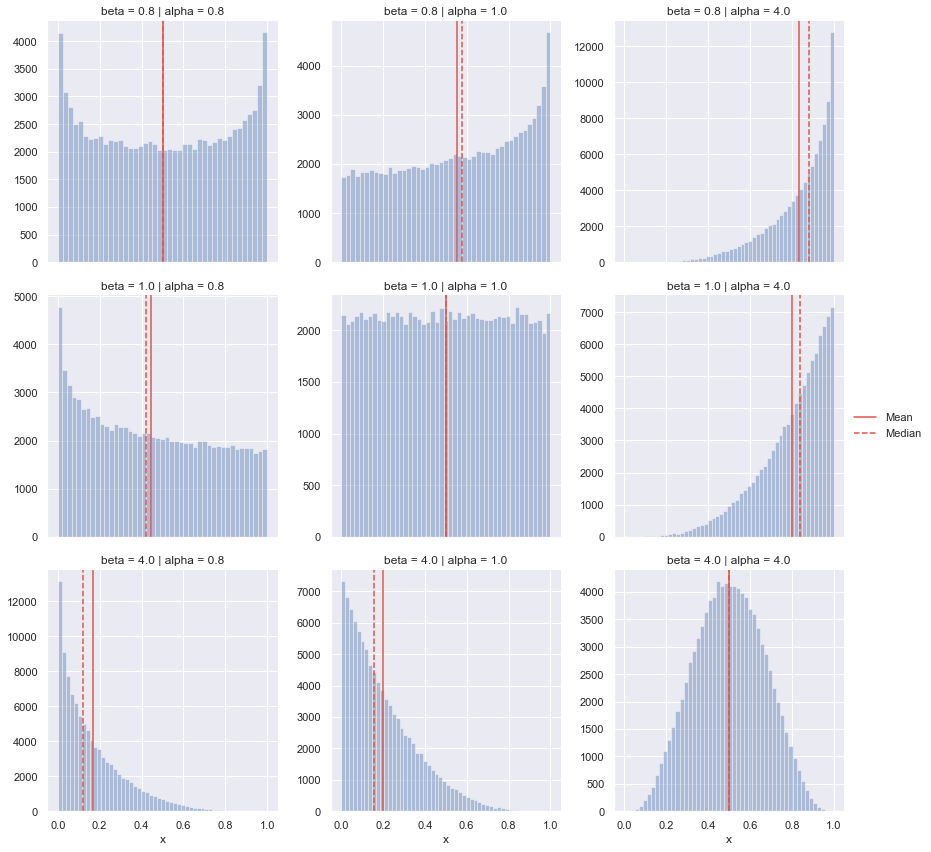

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

dat = pd.DataFrame()
vals = [0.8, 1, 4]
for alpha in vals:
    for beta in vals:
        x = {
            'x' :np.random.beta(alpha, beta, size = 100000),
            "alpha" : alpha,
            "beta":beta
        }
        x['mean'] = np.mean(x['x'])
        x['median'] = np.median(x['x'])
        dat = dat.append(pd.DataFrame(x))
        
def vertical_line(x, **kwargs):
    plt.axvline(x[1],**kwargs)
    
g = sns.FacetGrid(dat, col="alpha", row="beta", sharey=False, height=4)
g = g.map(vertical_line, "mean", c='#e35349', label='Mean')
g = g.map(vertical_line, "median", c='#e35349', label='Median', linestyle="--")
g = g.map(sns.distplot, "x", kde=False).add_legend()
g.savefig("./distributions.png", dpi=150)
g   

Bimodal - Symmetrisch, Unimodal - Linksschief, Unimodal- Linksschief

Unimodal - Rechtsschief, Kein Modus- Symmetrisch - Gleichverteilung, Unimodal- Linksschief

Unimodal - Rechtsschief/ Linkssteil, Unimodal - Rechtsschief/ Linkssteil, Unimodal - Symmetrisch

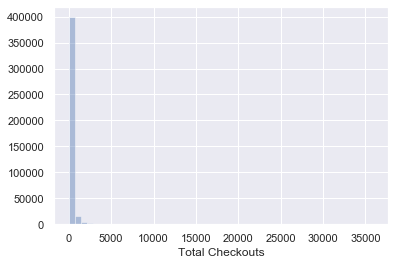

In [4]:
df = pd.read_csv("../data/Library_Usage.csv")
sns.set()
sns.distplot(df["Total Checkouts"], kde = False)
# kde

# 3.7 Exkurs: Ausreißerentfernung III

In [10]:
df["Total Checkouts Sqrt"] = df["Total Checkouts"]**(0.5)
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,Total Checkouts Sqrt
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,0.000000
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0,5.567764
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,0.000000
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,0.000000
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0,11.224972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015,p,phone,False,2009,False,9.0,17.058722
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0,3.872983
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0,14.422205
423446,0,ADULT,26,0,10 to 19 years,M6,Mission,April,2015,z,email,True,2003,False,9.0,5.099020


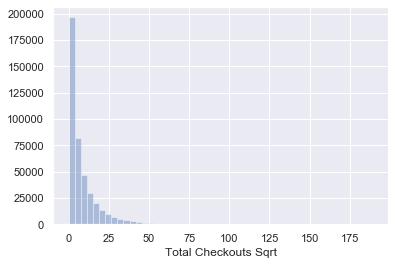

In [7]:
sns.distplot(df['Total Checkouts Sqrt'],kde = False)

### 3.3.:
df_TCless4286 = (df['Total Checkouts'] < 4286) alpha =0.0015 df['Total Checkouts'].quantile([alpha, 1-alpha
### 3.5:
df_TC = (df['Total Checkouts'] < 279.2)  ausreisser = q75 + 1.5*(q75-q25)

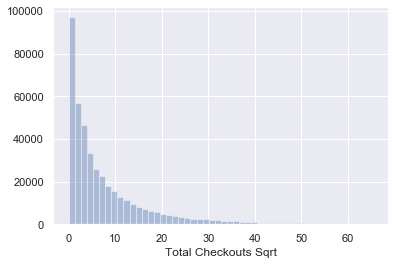

In [18]:
# 3.3 
df_1= df.loc[df['Total Checkouts']<4286]
sns.distplot(df_1['Total Checkouts Sqrt'],kde = False)

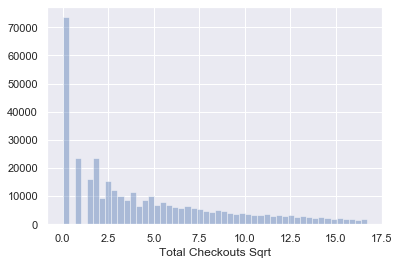

In [19]:
#3.5
df_2= df.loc[df['Total Checkouts']<279.2]
sns.distplot(df_2['Total Checkouts Sqrt'],kde = False)

## KREUZTABELLEN

In [5]:

import pandas as pd 
df = pd.read_csv(
         "../data/Library_Usage.csv",
          na_values="none"
)

pd.crosstab(
   df["Provided Email Address"],
   df["Notice Preference Definition"],
   margins = True, normalize=0
    )

Notice Preference Definition,email,phone,print
Provided Email Address,,,
False,0.001092,0.670627,0.328281
True,0.962615,0.029160,0.008225
All,0.765004,0.160994,0.074003


# 3.8 Exkurs: Anscombe-Quartett

In [8]:
#df['Total Checkouts'].corr(df["Total Renewals"]) 0.589362
df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].corr(df['Total Renewals'])

0.5893620279316908

In [13]:
dat = pd.read_csv("../data/anscombe.csv")
dat

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [16]:
data =[[dat["x1"].mean(),dat["x1"].median(),dat["x1"].std()],
       [dat["y1"].mean(),dat["y1"].median(),dat["y1"].std()],
       [dat["x2"].mean(),dat["x2"].median(),dat["x2"].std()],
       [dat["y2"].mean(),dat["y2"].median(),dat["y2"].std()],
       [dat["x3"].mean(),dat["x3"].median(),dat["x3"].std()],
       [dat["y3"].mean(),dat["y3"].median(),dat["y3"].std()],
       [dat["x4"].mean(),dat["x4"].median(),dat["x4"].std()],
       [dat["y4"].mean(),dat["y4"].median(),dat["y4"].std()],
]
dataSum = pd.DataFrame(data,columns=['mean','median','std'])
print(dataSum)

corr1 = dat["x1"].corr(dat["y1"])
corr2 =dat["x2"].corr(dat["y2"])
corr3 =dat["x3"].corr(dat["y3"])
corr4 =dat["x4"].corr(dat["y4"])
print(corr1, corr2, corr3, corr4)

       mean  median       std
0  9.000000    9.00  3.316625
1  7.500909    7.58  2.031568
2  9.000000    9.00  3.316625
3  7.500909    8.14  2.031657
4  9.000000    9.00  3.316625
5  7.500000    7.11  2.030424
6  9.000000    8.00  3.316625
7  7.500909    7.04  2.030579
0.81642051634484 0.8162365060002427 0.8162867394895982 0.8165214368885028


In [14]:
dat.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [15]:
for i in range(1, 5):
    correlation = dat[f'x{i}'].corr(dat[f'y{i}'])
    print(f'x{i}, y{i}: {correlation}')

x1, y1: 0.81642051634484
x2, y2: 0.8162365060002427
x3, y3: 0.8162867394895982
x4, y4: 0.8165214368885028


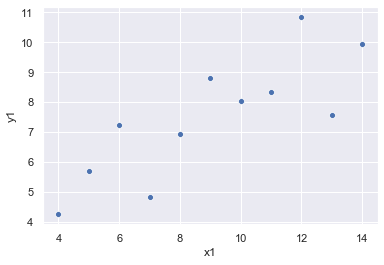

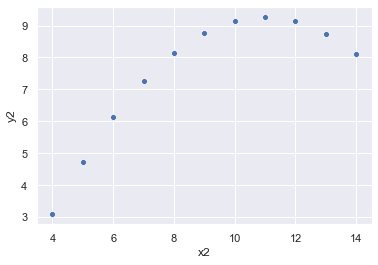

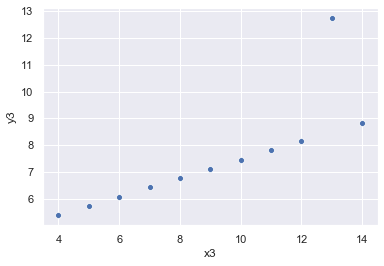

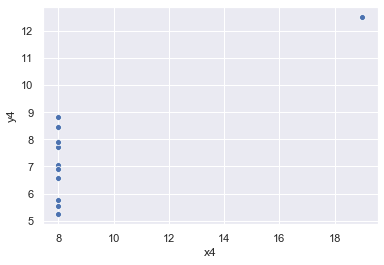

In [17]:
for i in range(1,5):
    plt.figure()
    sns.scatterplot(f'x{i}',f'y{i}',data =dat)

# 3.9 Balkendiagramme bei Fox News

7,066,000 wirkt  2-3 Fach größer als 6,000,000 (links) im 1. Diagramm.   ich denke, es ist eine Täuschung. 

im 2. Diagram auch.  Im Tatsache ist 4.6% angestiegt aber in Bild  wirkt,,, mehrfach angestiegt würde...




# Quiz


In [7]:
df['Provided Email Address'][df['Age Range'] == '0 to 9 years'].sum()

28338

In [9]:
df['Total Checkouts'].quantile(0.60)

39.0

In [10]:
df['Age Range'].mode()

0    25 to 34 years
dtype: object

In [11]:
Tdf['Total Renewals'].quantile([0.25, 0.75]).diff()

0.25     NaN
0.75    27.0
Name: Total Renewals, dtype: float64

# Tutorials

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv").sample(n=1000)

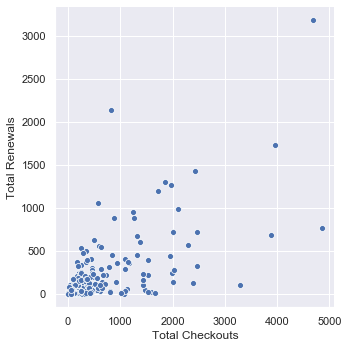

In [21]:
sns.relplot(x="Total Checkouts", y="Total Renewals", data =df)

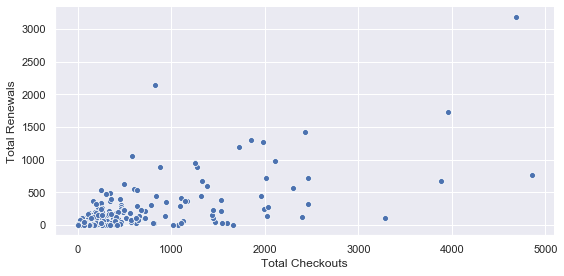

In [30]:
sns.relplot(x="Total Checkouts", y="Total Renewals", data =df,
           height = 4, aspect =2)

In [31]:
plt.savefig("../tutorial.png", dp = 150)

<Figure size 432x288 with 0 Axes>

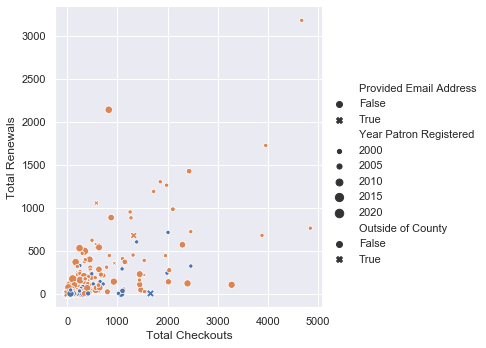

In [37]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Outside of County', 
                size='Year Patron Registered',
                data=df)

In [38]:
plt.savefig("../tutorial1.png", dp = 150)

<Figure size 432x288 with 0 Axes>

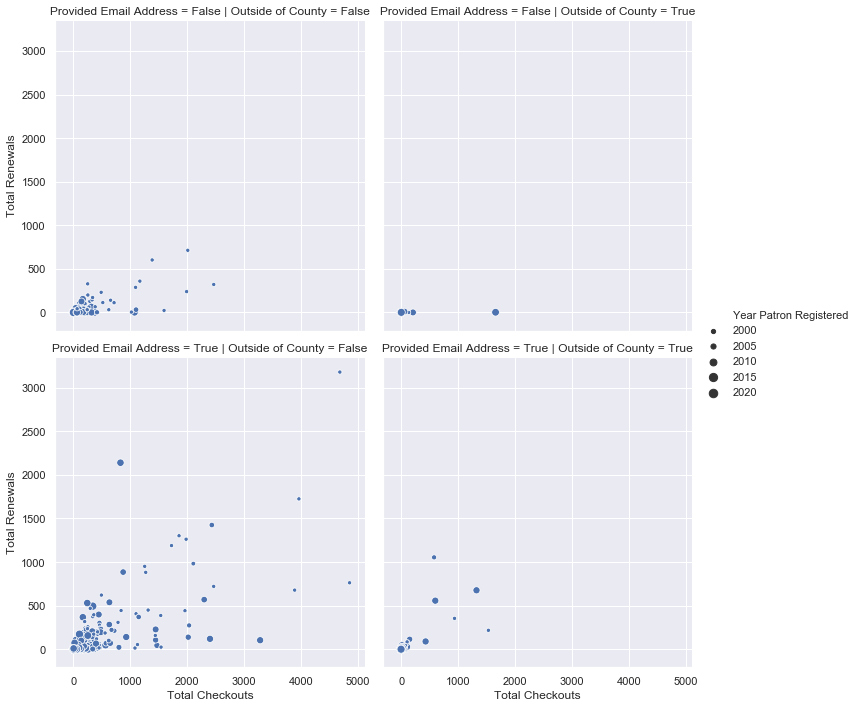

In [39]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Outside of County', data=df)

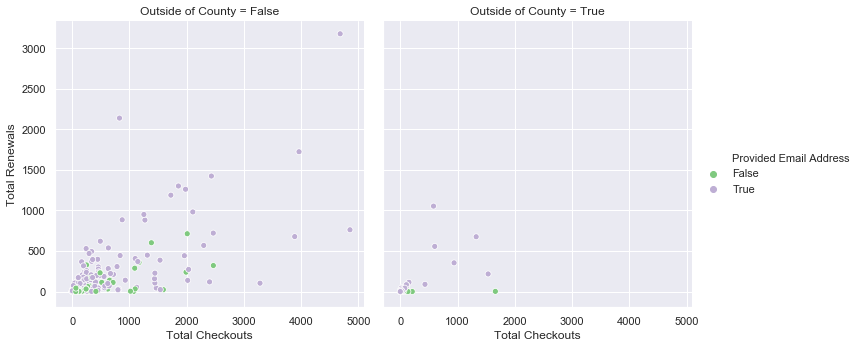

In [40]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Outside of County',
            palette=sns.color_palette('Accent', 2), 
            data=df)

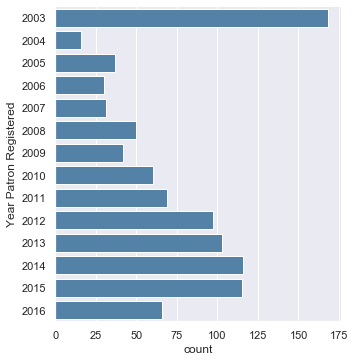

In [41]:
sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

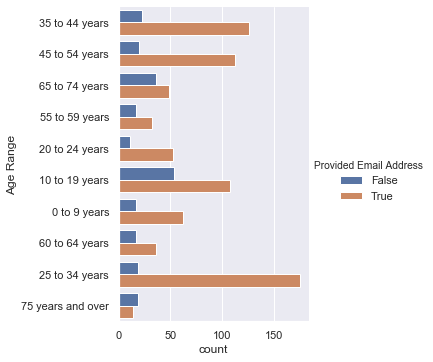

In [42]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

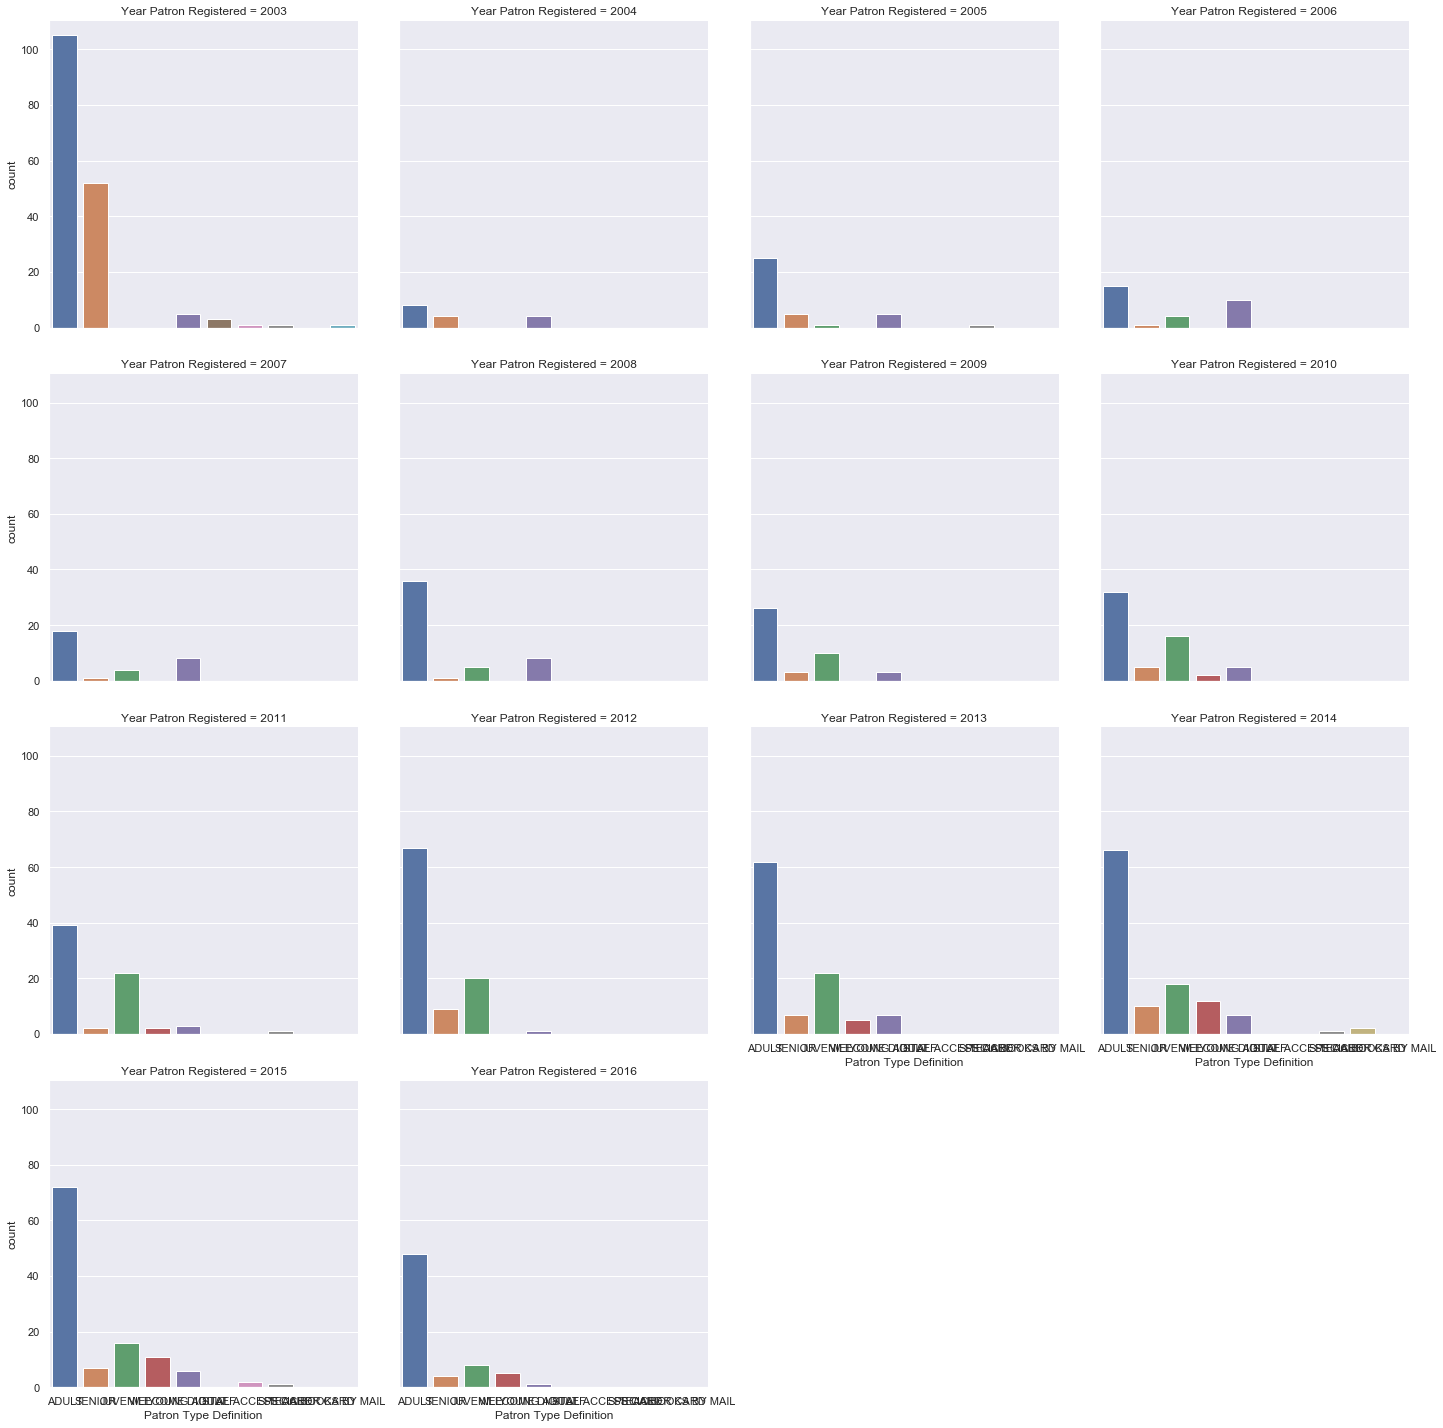

In [43]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)

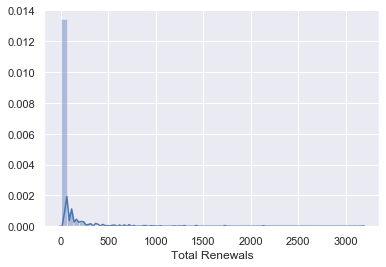

In [45]:
# Histogram

sns.distplot(df['Total Renewals'], kde=True)



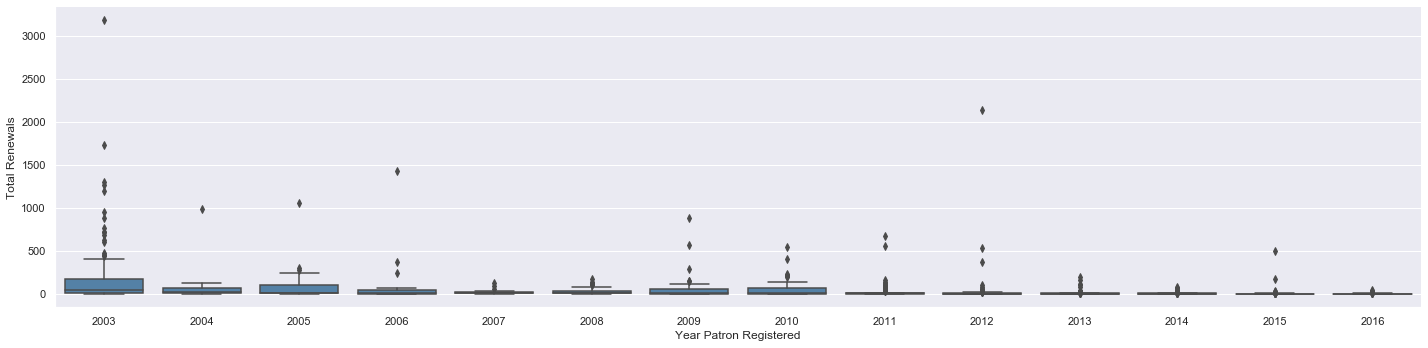

In [50]:
sns.catplot(x='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='box', color="steelblue", aspect=4)